# モデル独自のパラメータ 決定木_多次元データ編

## このNotebookのねらい
- タイタニックのデータを通じて決定木の特徴を理解する
    - 分類の仕方
    - ハイパーパラメータ(max_depthのみ)
    - 解釈性能の高さ
    - 過学習のしやすさ
    - 相対重要度

## このNotebookで重要じゃないこと
- 〇〇

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz


def show_tree(tree_model, X):
    dot_data = export_graphviz(tree_model,
                               out_file=None,
                               feature_names=X.columns,
                               class_names=['0', '1'],
                               filled=True,
                               rounded=True)

    g = pydotplus.graph_from_dot_data(dot_data)
    display(Image(g.create_png()))


In [3]:
from sklearn.model_selection import train_test_split


def train(model, X, y):
    """訓練およびTrainとValidのAccuracyを出力する関数"""
    X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                          train_size=0.7, random_state=0)

    model.fit(X_train, y_train)

    acc_train = model.score(X_train, y_train)
    acc_valid = model.score(X_valid, y_valid)

    model_name = model.__class__.__name__
    print(f'[{model_name}] Train Accuracy: {acc_train:.3f}')
    print(f'[{model_name}] Valid Accuracy: {acc_valid:.3f}')

    return model

# データの準備

In [4]:
titanic = pd.read_csv('input/titanic/train.csv')

# わかりやすさを優先するので扱いにくいデータは意図的に無視する
titanic = titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

titanic.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

In [5]:
# 欠損も大雑把に対応する
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

titanic['Pclass'] = titanic['Pclass'].map(
    {1: 'first', 2: 'second', 3: 'third'})

In [6]:
# ダミー変数化
X = pd.get_dummies(titanic.drop(columns=['Survived']))
y = titanic['Survived']

In [7]:
X.head()

Age  SibSp  Parch     Fare  Pclass_first  Pclass_second  Pclass_third  \
0  22.0      1      0   7.2500             0              0             1   
1  38.0      1      0  71.2833             1              0             0   
2  26.0      0      0   7.9250             0              0             1   
3  35.0      1      0  53.1000             1              0             0   
4  35.0      0      0   8.0500             0              0             1   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0           0         1           0           0           1  
1           1         0           1           0           0  
2           1         0           0           0           1  
3           1         0           0           0           1  
4           0         1           0           0           1

# いろいろな深さ(Depth)の決定木をつくって実験

## max_depth = 1

[DecisionTreeClassifier] Train Accuracy: 0.787
[DecisionTreeClassifier] Valid Accuracy: 0.787


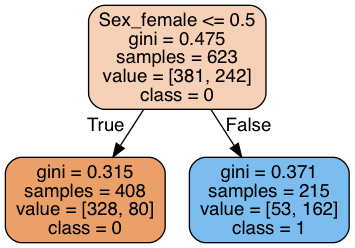

In [8]:
tree1 = train(DecisionTreeClassifier(max_depth=1), X, y)

show_tree(tree1, X)

## max_depth = 2

[DecisionTreeClassifier] Train Accuracy: 0.791
[DecisionTreeClassifier] Valid Accuracy: 0.787


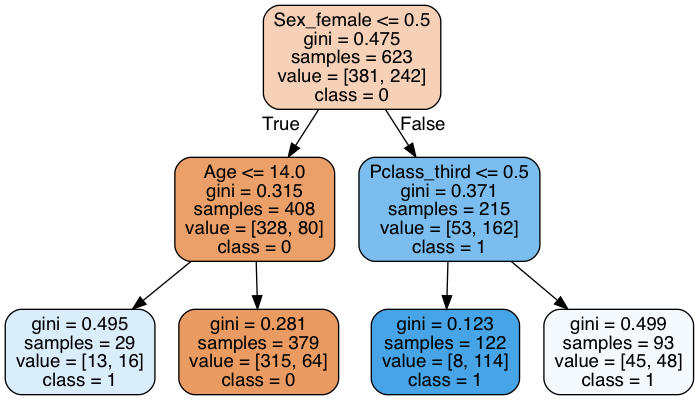

In [9]:
tree2 = train(DecisionTreeClassifier(max_depth=2), X, y)

show_tree(tree2, X)

## max_depth = 3

[DecisionTreeClassifier] Train Accuracy: 0.836
[DecisionTreeClassifier] Valid Accuracy: 0.821


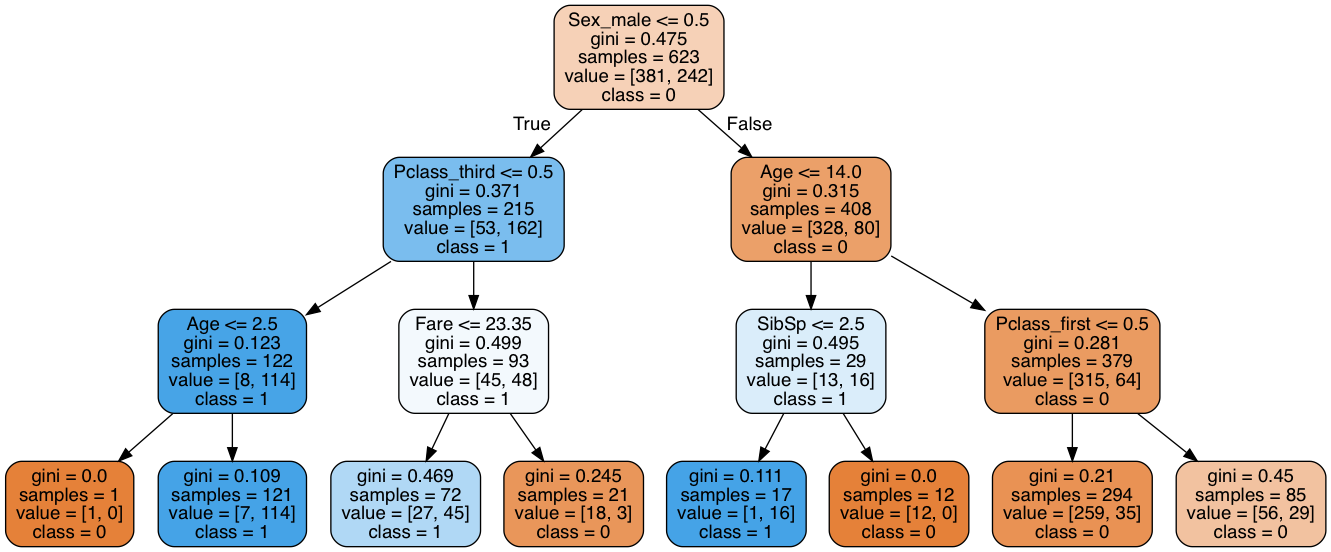

In [10]:
tree3 = train(DecisionTreeClassifier(max_depth=3), X, y)

show_tree(tree3, X)

## max_depth = 4

[DecisionTreeClassifier] Train Accuracy: 0.839
[DecisionTreeClassifier] Valid Accuracy: 0.821


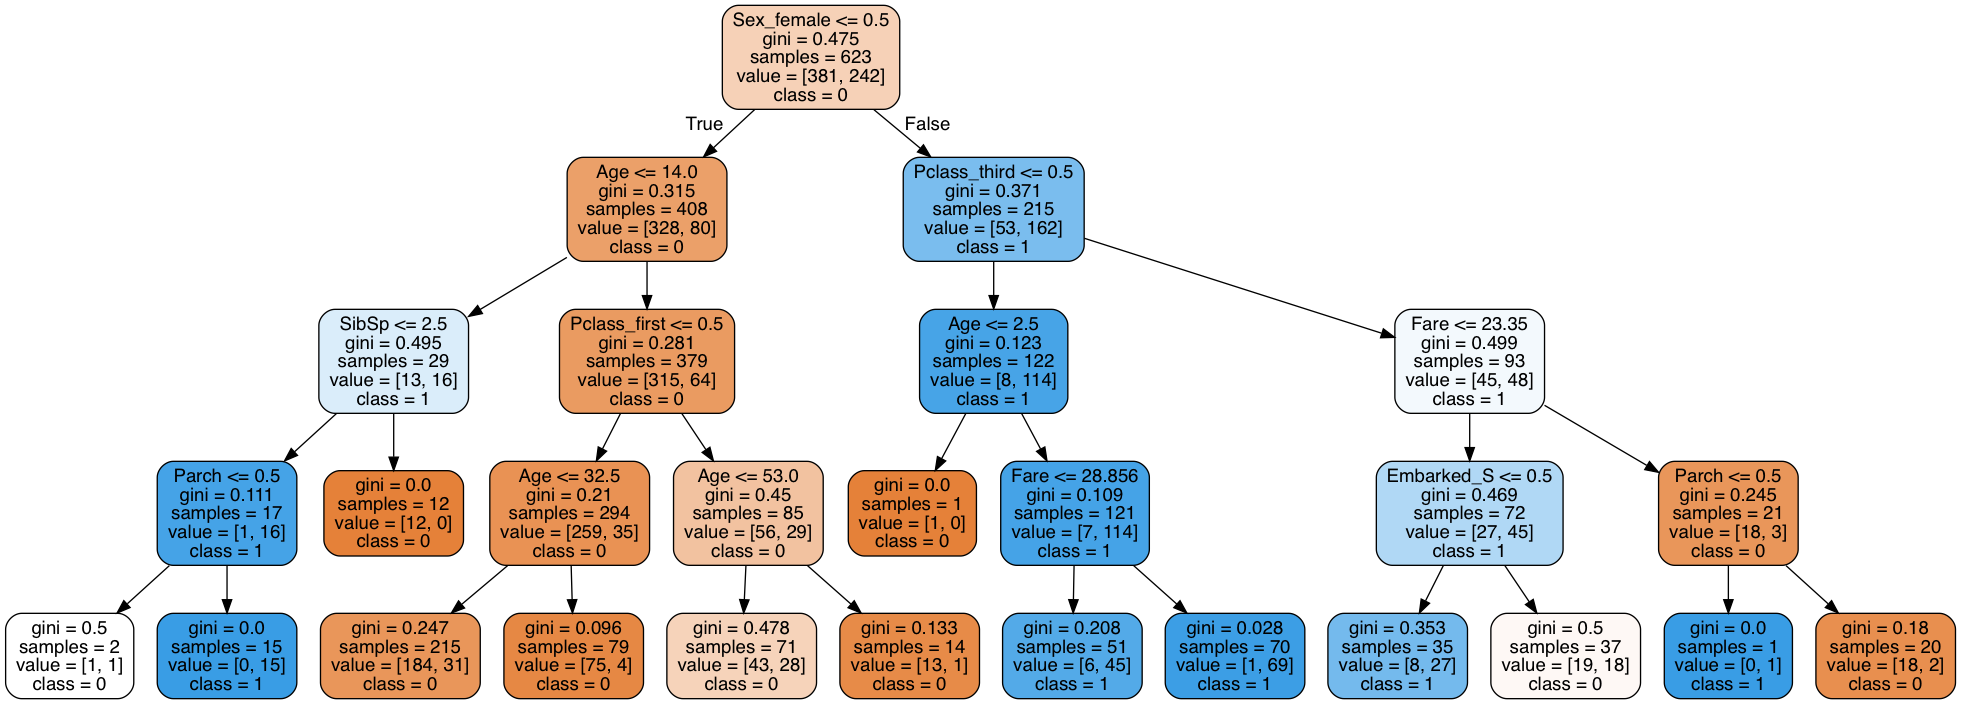

In [11]:
tree4 = train(DecisionTreeClassifier(max_depth=4), X, y)

show_tree(tree4, X)

## max_depth = 10

[DecisionTreeClassifier] Train Accuracy: 0.949
[DecisionTreeClassifier] Valid Accuracy: 0.795


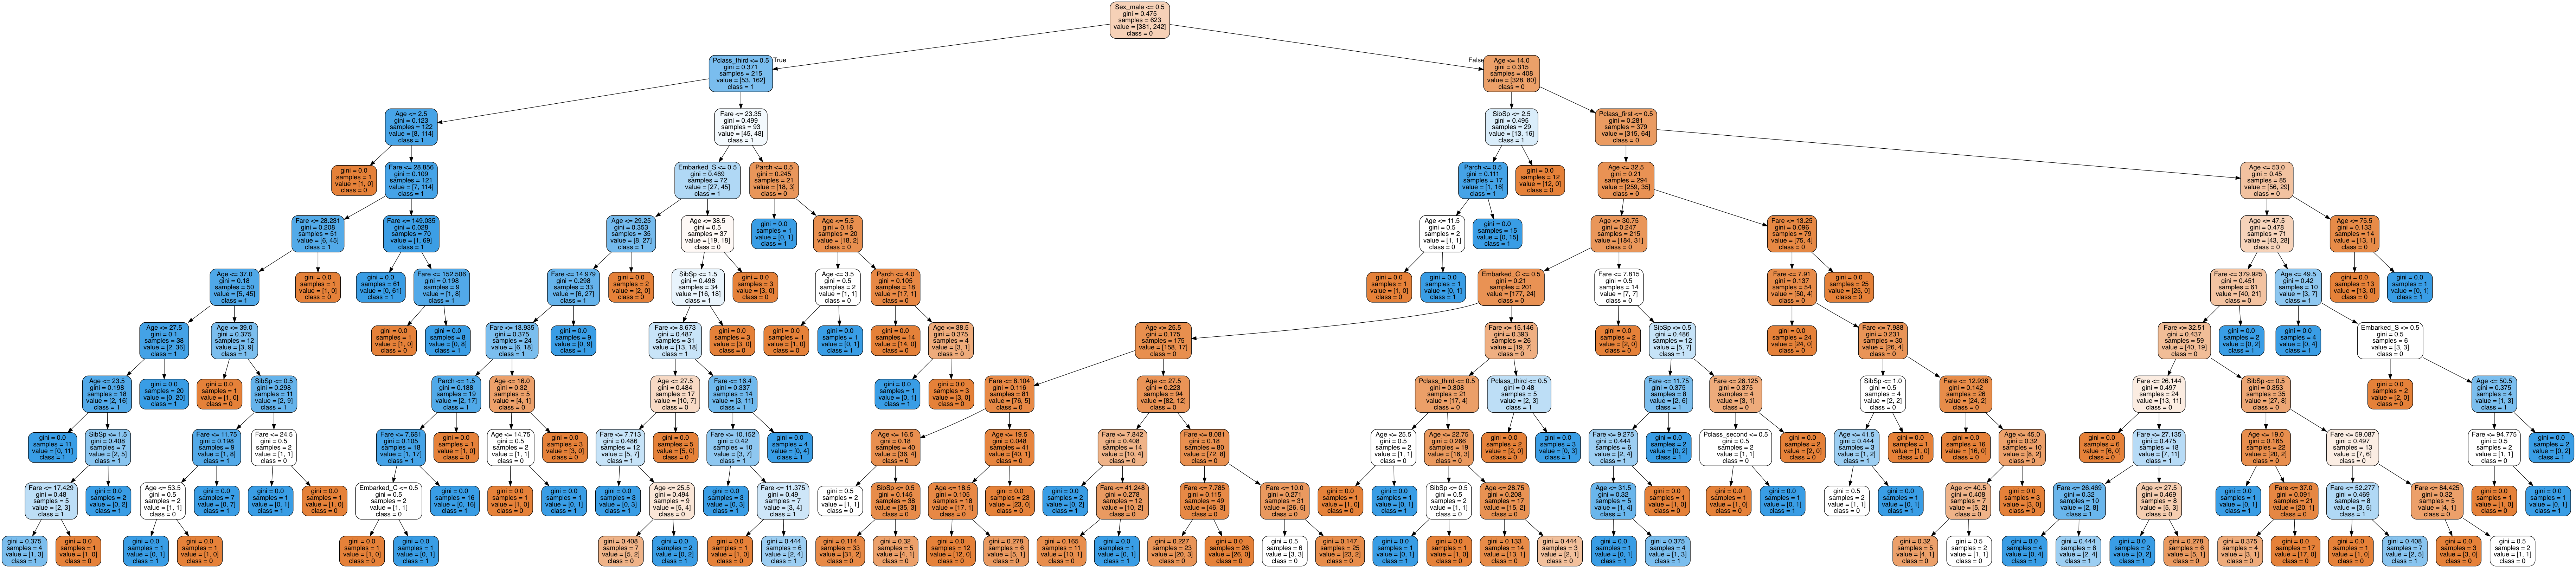

In [12]:
tree10 = train(DecisionTreeClassifier(max_depth=10), X, y)

show_tree(tree10, X)

# 決定木は相対重要度もみれる

In [13]:
def visualize_feature_importance(model, X_train):
    # barplotに持ち込むためのDFを生成
    df = pd.DataFrame()
    df['feature_name'] = X_train.columns
    df['feature_importance'] = model.feature_importances_

    # 降順のほうが見やすいのでソート
    df.sort_values(by='feature_importance', ascending=False, inplace=True)

    # 重要度0はノイズに思えるので除外している
    df = df[df['feature_importance'] > 0]

    sns.barplot(x='feature_importance',
                y='feature_name',
                data=df)

    plt.xlim(0, 1.0)

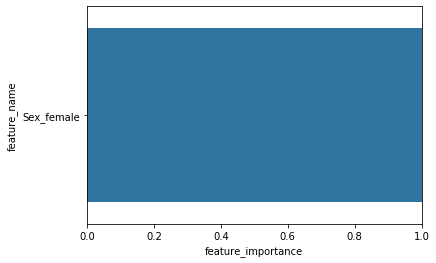

In [14]:
visualize_feature_importance(tree1, X)

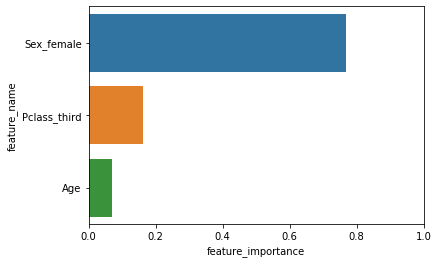

In [15]:
visualize_feature_importance(tree2, X)

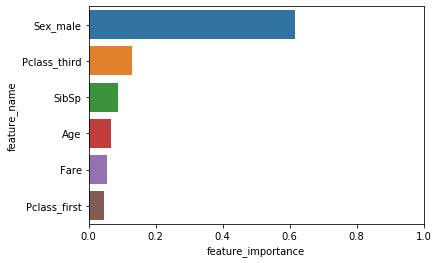

In [16]:
visualize_feature_importance(tree3, X)

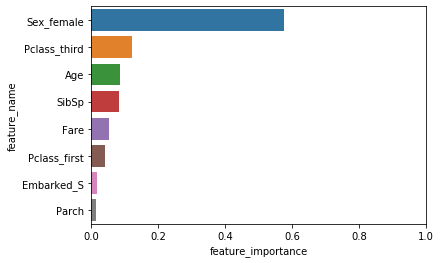

In [17]:
visualize_feature_importance(tree4, X)

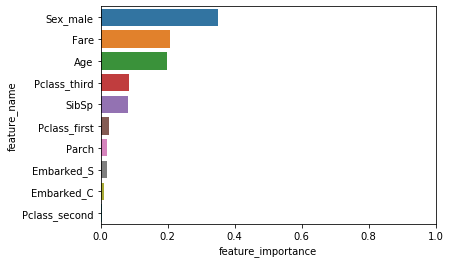

In [18]:
visualize_feature_importance(tree10, X)

# 演習
- タイタニック以外のデータでも決定木を使い、結果と相対重要度を可視化してみよう

おわり